<a href="https://colab.research.google.com/github/MAzewail/Raspberry-Pi-Ai-Kit/blob/main/raspberry_pi_ai_kit_custom_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Check** **Resource**

In [ ]:
!nvidia-smi

Tue Dec  3 22:10:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# **Install YOLOV8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


# **Exporting Dataset**

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir datasets
%cd datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fX9vAEhNs2EBYFj9GmEa")
project = rf.workspace("test-oojq8").project("cytron-products-j8kjb")
version = project.version(1)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


# **Custom** **Training**

In [ ]:
%cd {HOME}

#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 batch=16 imgsz=640 plots=True
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 batch=16 imgsz=640 plots=True amp=True lr0=0.01 augment=True save_period=10 patience=5


/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

# **Confusion Matrix**

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1733261668.b24c7d27bee9.3018.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


/content


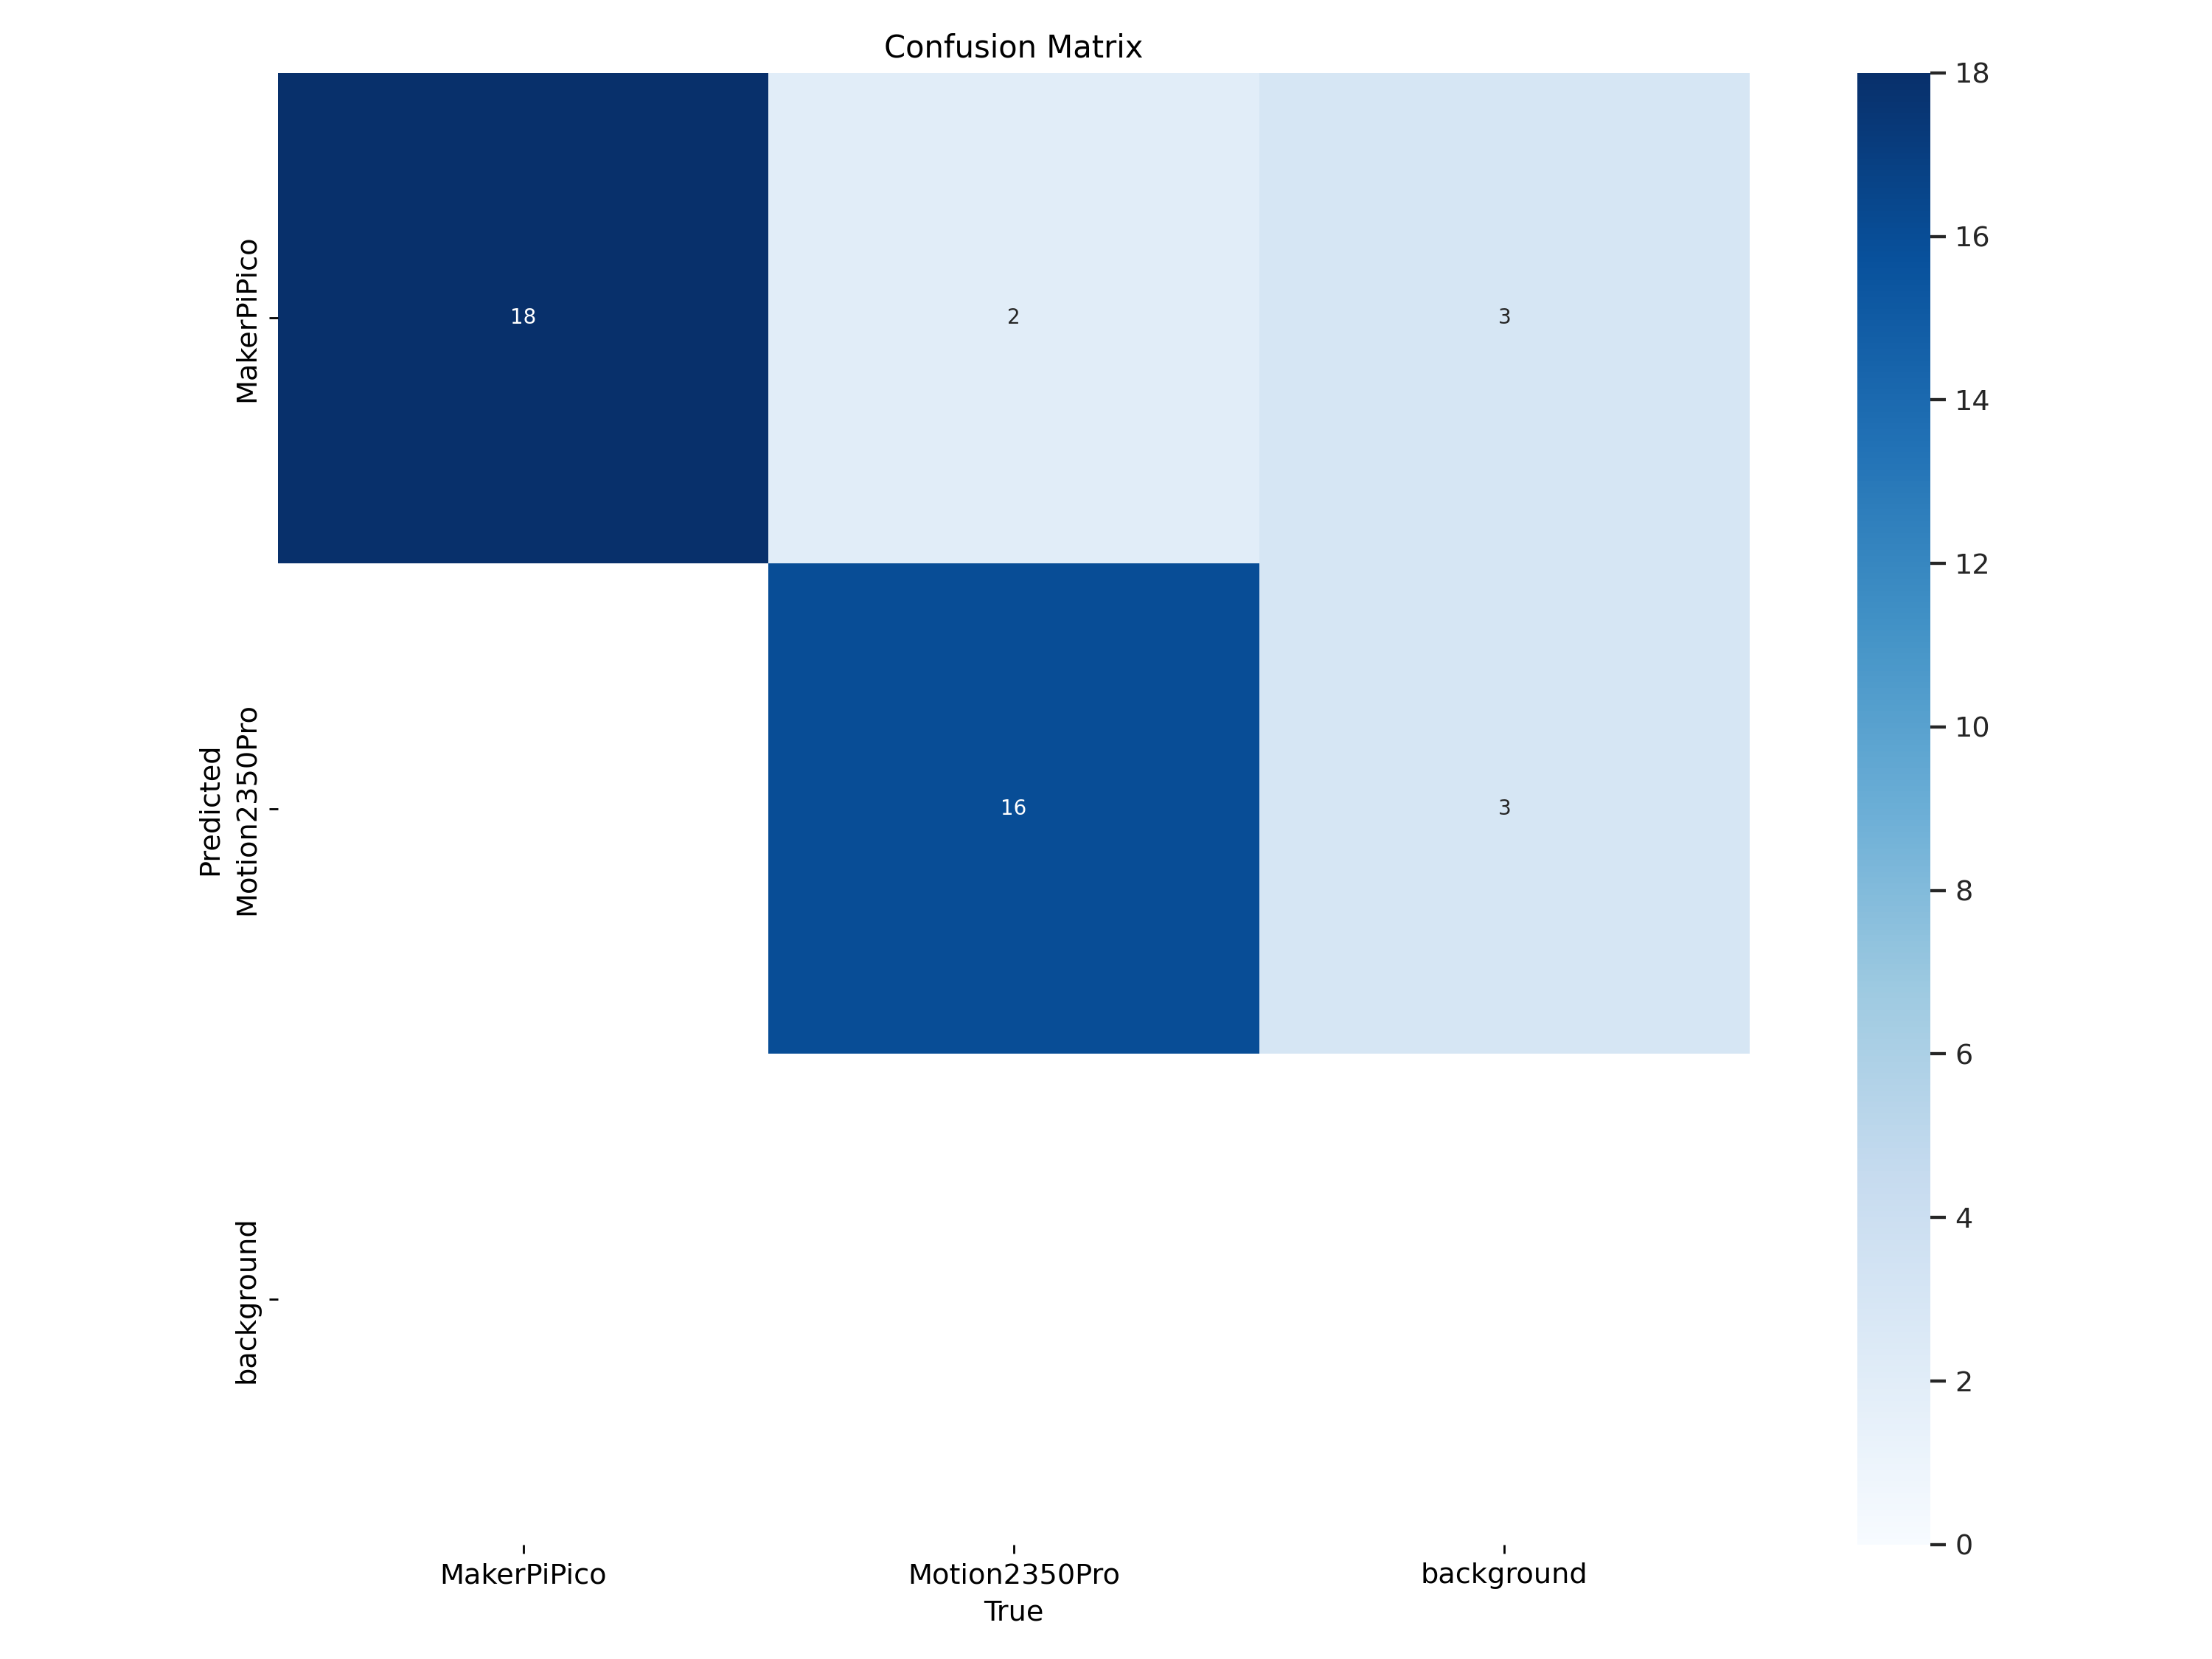

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

# **Model Validation**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

# **Inference**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

# **Result**

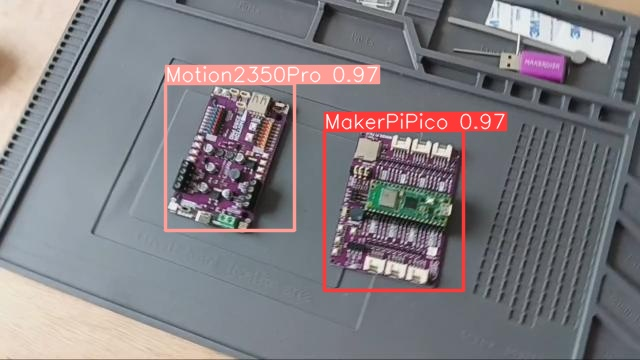

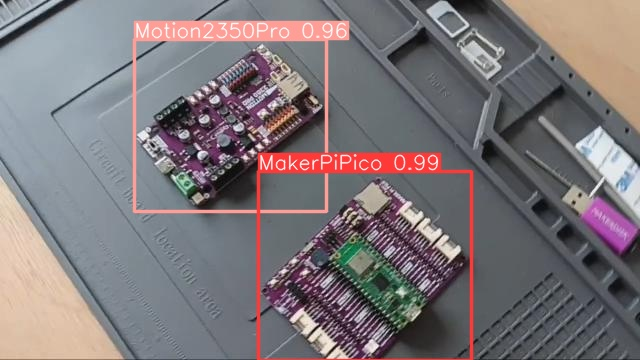

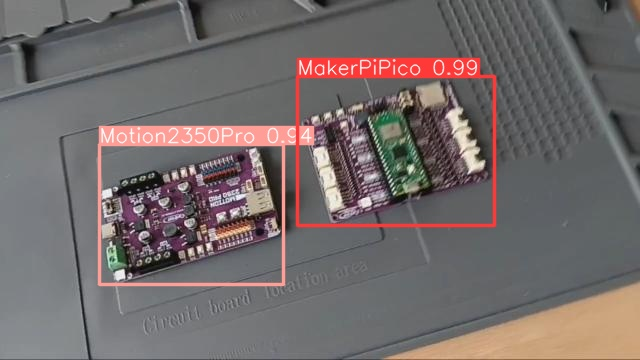

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# **Export** **ONNX**

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Export the model to ONNX format
model.export(format='onnx', opset=12)  # creates 'yolov8n.onnx'




You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 g

'/content/runs/detect/train/weights/best.onnx'

# **Download** **ONNX**

In [ ]:
# from google.colab import files

# # Replace 'model.onnx' with the correct path to your exported model
# files.download('/content/runs/detect/train2/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !zip -r data.zip /content/datasets/Cytron-Products-1

In [ ]:
import onnx

# Load the exported ONNX model
onnx_model = onnx.load('/content/runs/detect/train/weights/best.onnx')

# Print IR version and opset version
print(f'IR Version: {onnx_model.ir_version}')
print(f'Opset Version: {onnx_model.opset_import[0].version}')


IR Version: 7
Opset Version: 12
